## The Julia package manager, `Pkg` 

Julia has a built-in package manager module, called `Pkg`;
Julia packages are [`git`](https://git-scm.com/) repositories.

The package called [`Distributions.jl`](), for example, is added with 

    Pkg.add("Distributions")   # no .jl 
    
and "removed" (although not completely deleted) with 

    Pkg.rm("Distributions")
    
[The package manager actually provides a dependency solver that determines which packages are actually required to be installed.]


The package ecosystem is rapidly maturing; a complete list of *registered* packages (which are required to have a certain level of testing and documentation) is available at <http://pkg.julialang.org/>. Non-registered packages are added by cloning the relevant git repository; `Pkg` again provides an interface for this operation:

In [5]:
Pkg.add("Distributions")

INFO: Nothing to be done


A package need only be `add`ed once, at which point it is downloaded into your local `.julia` directory in your home directory, in a subdirectory `v0.3` or `v0.4`, depending on your Julia version. [If you start having problems with packages that seem to be unsolvable, you can try just deleting your `.julia` directory and reinstalling all your packages.]

Periodically, you should run

    Pkg.update()
    
which (currently) checks for, downloads and installs updated versions of *all* the packages you currently have installed.

In [6]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


## `using` 

Packages provide Julia *modules*, which are not loaded by default. To load a package, do e.g.

    using Distributions
    
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command.

An alternative is

    import Distributions
    
Now, the functions from the `Distributions` package are available only using `Distributions.<NAME>`. (All functions, not only exported functions, are always available like this.)

# PyPlot 

`PyPlot` is a Julia *package* (library) for publication-quality plots, mainly in 2D (although with limited support for simple 3D plots).

It is a Julian interface to the `pyplot` module of the Python `matplotlib` library, which is a well-known and mature plotting library for Python. It provides a direct plotting style where features of plots are turned on and off through independent commands; complicated plots [may be created](http://matplotlib.org/gallery.html). All of the functions from the `pyplot` module are made available directly, and the interface between Julian objects and the corresponding Python types is transparent (using the `PyCall.jl` module).

[1] Add the PyPlot package and load it. Examine the list of available functions using tab completion.

In [12]:
using PyPlot

INFO: Precompiling module PyPlot...
INFO: Installing matplotlib via the Conda matplotlib package...


[2] Make some random data for $x$ and $y$ coordinates of the same length and store them in variables `xx` and `yy`. Plot them using

    plot(xx, yy, "o")
    
The "o" string is used to change the plotting style to points.

[3] What happens if you remove the "o" string? What happens if you just do `plot(xx)`?

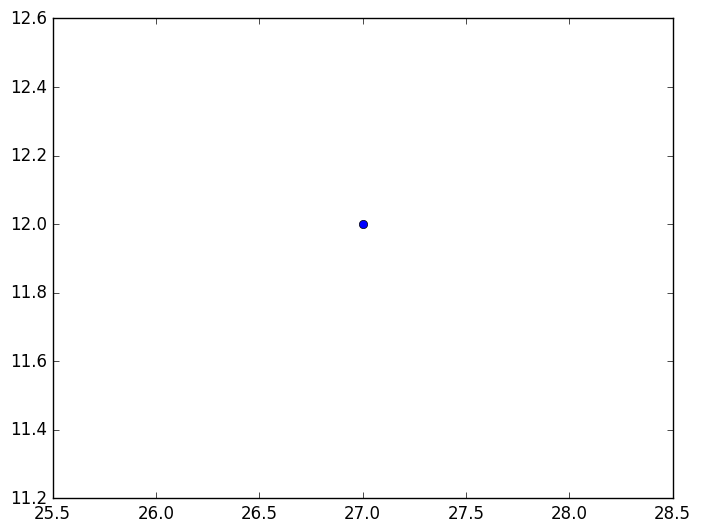

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002AB99F28>

In [15]:
plot(27,12,"o")

PyPlot is designed for plotting data (as opposed to functions). In order to plot functions, we must sample them appropriately.

[4] Create an array (or other object) `xx` of numbers equally spaced from -3 to 3 and a small step.
Create an array `yy` given by $3x^2 - 2$. Draw the function.

[5] Use the help [`?plot` o `help(plot)`] to change the style of the plot to use red lines and green points.
Look up (or ask your neighbour) para cambiar el estilo de la gráfica para utilizar líneas rojas y puntos verdes.

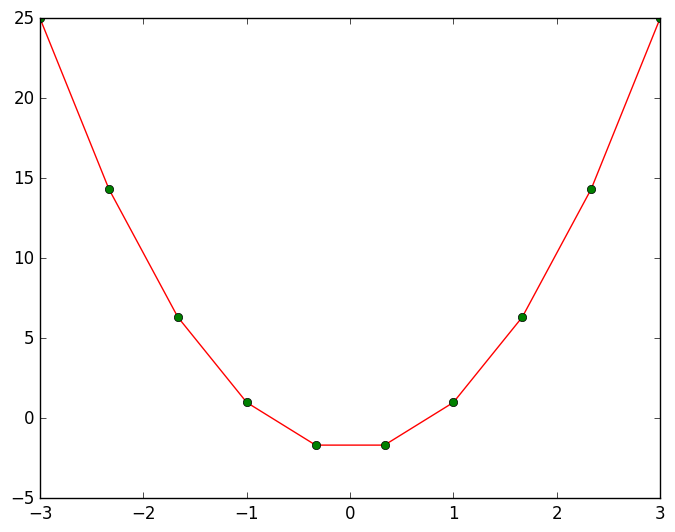

In [27]:
x = linspace(-3,3,10);
y = 3*x.^2 - 2;
plot(x,y,"r-", marker="o", markerfacecolor="green");

In [21]:
?plot

search: plot plot3D plotfile plot_date plot_trisurf plot_surface plot_wireframe



Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-

## Exercise: The Newton fractal 

The (1D) Newton (or Newton-Raphson) method finds roots (zeros) of a nonlinear function $f$ of one variable. It is an iterative method defined by

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

[1] Implement the Newton method to find roots of a function $f$. Use it to find square roots of $2$. [You can use Unicode to define a variable with the name $f'$ by writing `f\prime<TAB>`.] 

Note that functions are **first-class objects** in Julia, i.e. you can use functions anywhere you would use other types of variables.

[2] Use the Newton method to find complex cube roots of $1$. Starting from a grid of initial conditions $x_0$, determine which of the roots each reaches. (Put a bound on the maximum time allowed.) Store the results in a matrix.

[3] Plot the resulting matrix using the `imshow`, `pcolor` and/or `pcolormesh` from `PyPlot`.

[4] Experiment with different complex functions, e.g. other polynomials and `sin`.

In [ ]:
function newtonsearch(guess)
    